<a href="https://colab.research.google.com/github/Aakushah/WordEmbeddingUsingPytorch/blob/main/Word_Embedding_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model initialized - Visualizing initial random embeddings:


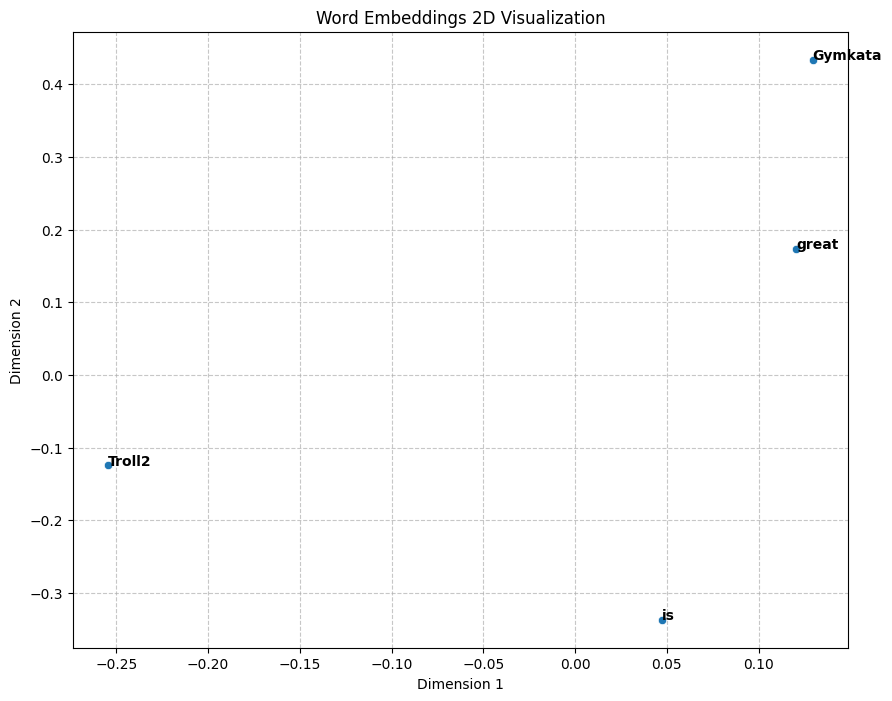


Starting training...
Epoch [10/100], Loss: 4.693676
Epoch [20/100], Loss: 3.148079
Epoch [30/100], Loss: 1.621883
Epoch [40/100], Loss: 0.793962
Epoch [50/100], Loss: 0.433679
Epoch [60/100], Loss: 0.268592
Epoch [70/100], Loss: 0.182663
Epoch [80/100], Loss: 0.132629
Epoch [90/100], Loss: 0.100935
Epoch [100/100], Loss: 0.079554

Training complete - Visualizing final embeddings:


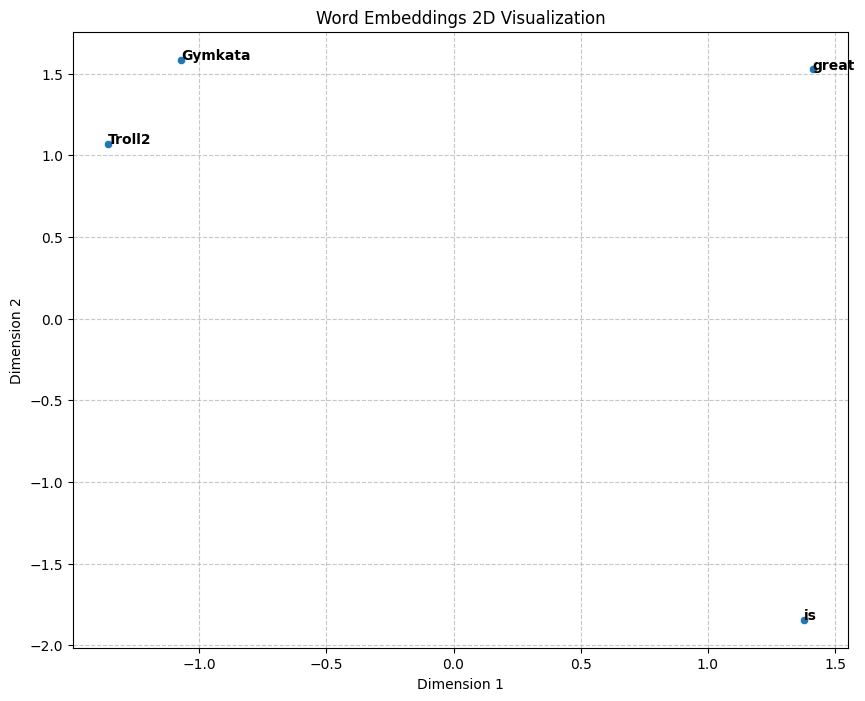


Initial embeddings:
     token        w1        w2
0   Troll2 -0.254403 -0.124218
1       is  0.047303 -0.336987
2    great  0.120442  0.173569
3  Gymkata  0.129416  0.433735

Final embeddings:
     token        w1        w2
0   Troll2 -1.358345  1.072130
1       is  1.376688 -1.843301
2    great  1.412311  1.526972
3  Gymkata -1.071728  1.585046

Testing model predictions:
Input: Troll2 → Predicted next word: is (probability: 0.9849)
Input: is → Predicted next word: great (probability: 0.9759)
Input: great → Predicted next word: Gymkata (probability: 0.9796)
Input: Gymkata → Predicted next word: is (probability: 0.9820)


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.distributions.uniform import Uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define one-hot encoded inputs and labels
inputs = torch.tensor([
    [1., 0., 0., 0.],  # one-hot encoding for "Troll 2"
    [0., 1., 0., 0.],  # one-hot encoding for "is"
    [0., 0., 1., 0.],  # one-hot encoding for "great"
    [0., 0., 0., 1.]   # one-hot encoding for "Gymkata"
])

# Changed to index-based targets for CrossEntropyLoss
labels = torch.tensor([
    1,  # "Troll 2" is followed by "is" (index 1)
    2,  # "is" is followed by "great" (index 2)
    3,  # "great" is followed by "Gymkata" (index 3)
    1   # "Gymkata" is followed by "is" (index 1)
])

# Simple word embedding model
class WordEmbeddingModel(nn.Module):
    def __init__(self, vocab_size=4, embedding_dim=2):
        super().__init__()

        # Initialize with uniform distribution
        min_value = -0.5
        max_value = 0.5

        # Input word embeddings (vocab_size x embedding_dim)
        self.input1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.input2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.input3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.input4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        # Output word embeddings (embedding_dim x vocab_size)
        self.output1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.output2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.output3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.output4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

    def forward(self, input_tensor):
        # Extract the actual input from the batch
        input_vector = input_tensor[0]

        # Map input to embedding space
        inputs_to_top_hidden = (
            (input_vector[0] * self.input1_w1) +
            (input_vector[1] * self.input2_w1) +
            (input_vector[2] * self.input3_w1) +
            (input_vector[3] * self.input4_w1)
        )

        inputs_to_bottom_hidden = (
            (input_vector[0] * self.input1_w2) +
            (input_vector[1] * self.input2_w2) +
            (input_vector[2] * self.input3_w2) +
            (input_vector[3] * self.input4_w2)
        )

        # Map from embedding space to output space
        output1 = (
            (inputs_to_top_hidden * self.output1_w1) +
            (inputs_to_bottom_hidden * self.output1_w2)
        )

        output2 = (
            (inputs_to_top_hidden * self.output2_w1) +
            (inputs_to_bottom_hidden * self.output2_w2)
        )

        output3 = (
            (inputs_to_top_hidden * self.output3_w1) +
            (inputs_to_bottom_hidden * self.output3_w2)
        )

        output4 = (
            (inputs_to_top_hidden * self.output4_w1) +
            (inputs_to_bottom_hidden * self.output4_w2)
        )

        # Stack outputs to create the pre-softmax output tensor
        output_presoftmax = torch.stack([output1, output2, output3, output4])

        # Apply softmax to get probabilities
        output_softmax = F.softmax(output_presoftmax, dim=0)

        return output_presoftmax  # Return logits for CrossEntropyLoss

# Function to visualize word embeddings
def visualize_embeddings(model, tokens=["Troll2", "is", "great", "Gymkata"]):
    data = {
        "w1": [model.input1_w1.item(),
               model.input2_w1.item(),
               model.input3_w1.item(),
               model.input4_w1.item()],
        "w2": [model.input1_w2.item(),
               model.input2_w2.item(),
               model.input3_w2.item(),
               model.input4_w2.item()],
        "token": tokens,
        "input": ["input1", "input2", "input3", "input4"]
    }

    df = pd.DataFrame(data)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x="w1", y="w2")

    # Add the token labels to the scatter plot
    for i in range(len(df)):
        plt.text(df.w1[i], df.w2[i], df.token[i],
                 horizontalalignment='left',
                 size='medium',
                 color='black',
                 weight='semibold')

    plt.title("Word Embeddings 2D Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    return df

# Initialize model before training
model = WordEmbeddingModel()
print("Model initialized - Visualizing initial random embeddings:")
initial_df = visualize_embeddings(model)

# Define loss function and optimizer - Using CrossEntropyLoss now
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
print("\nStarting training...")

for epoch in range(num_epochs):
    total_loss = 0

    for i in range(len(inputs)):
        # Prepare the input and label tensors
        input_i = inputs[i].unsqueeze(0)  # Add batch dimension
        label_i = labels[i]  # Using index-based label

        # Forward pass
        output_i = model(input_i)  # Shape: [4]
        loss = criterion(output_i.unsqueeze(0), label_i.unsqueeze(0))  # Add batch dimension

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update weights

        total_loss += loss.item()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.6f}")

    # Early stopping condition
    if total_loss < 0.01:  # Adjusted threshold for cross-entropy
        print(f"Training stopped early at epoch {epoch+1} with loss: {total_loss:.6f}")
        break

print("\nTraining complete - Visualizing final embeddings:")
final_df = visualize_embeddings(model)

# Compare initial and final embeddings
print("\nInitial embeddings:")
print(initial_df[["token", "w1", "w2"]])

print("\nFinal embeddings:")
print(final_df[["token", "w1", "w2"]])

# Test the model with inputs
print("\nTesting model predictions:")
tokens = ["Troll2", "is", "great", "Gymkata"]

for i, token in enumerate(tokens):
    input_tensor = inputs[i].unsqueeze(0)
    output = model(input_tensor)

    # Apply softmax to get probabilities
    probabilities = F.softmax(output, dim=0)

    predicted_idx = torch.argmax(probabilities).item()

    print(f"Input: {token} → Predicted next word: {tokens[predicted_idx]} (probability: {probabilities[predicted_idx]:.4f})")

Model initialized - Visualizing initial random embeddings:


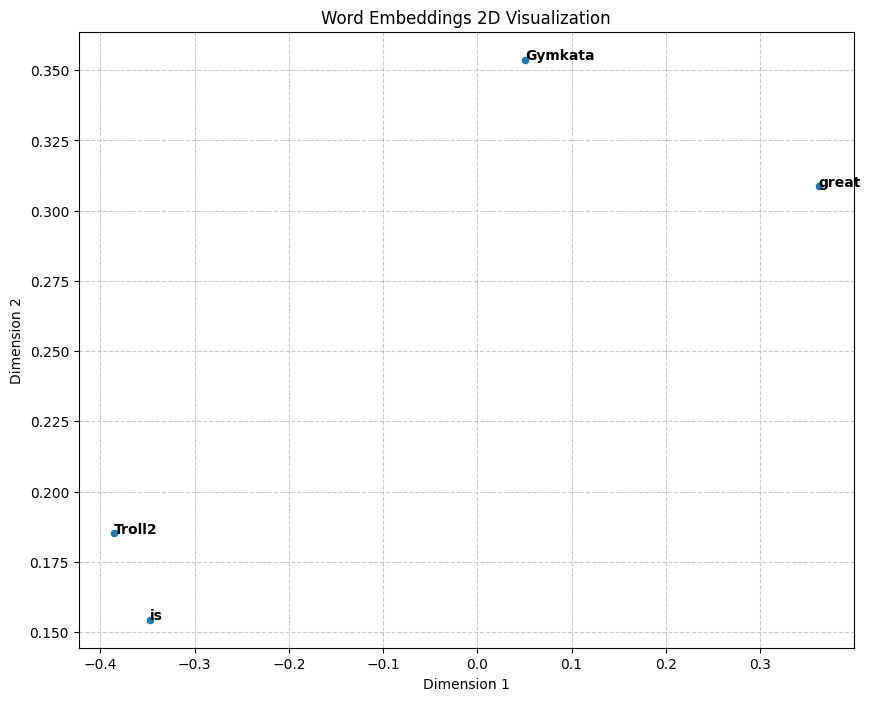


Starting training...
Epoch [10/100], Loss: 4.781855
Epoch [20/100], Loss: 3.293863
Epoch [30/100], Loss: 1.872377
Epoch [40/100], Loss: 0.985600
Epoch [50/100], Loss: 0.520781
Epoch [60/100], Loss: 0.305756
Epoch [70/100], Loss: 0.200841
Epoch [80/100], Loss: 0.142880
Epoch [90/100], Loss: 0.107330
Epoch [100/100], Loss: 0.083817

Training complete - Visualizing final embeddings:


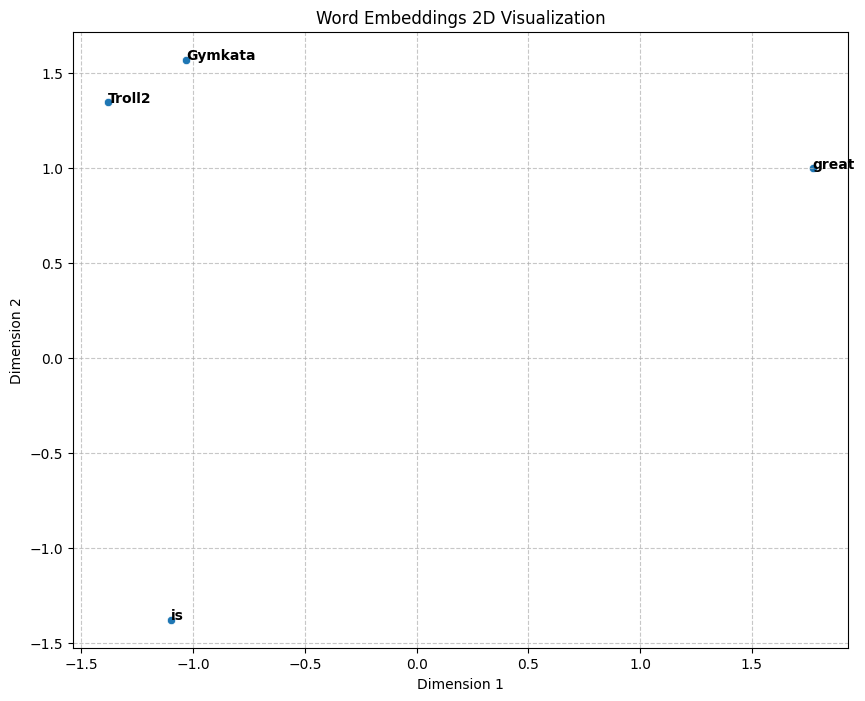


Initial embeddings:
     token        w1        w2
0   Troll2 -0.385480  0.185113
1       is -0.347064  0.154389
2    great  0.362112  0.308770
3  Gymkata  0.050405  0.353746

Final embeddings:
     token        w1        w2
0   Troll2 -1.380107  1.347779
1       is -1.098925 -1.377741
2    great  1.772139  0.998743
3  Gymkata -1.031026  1.571221

Testing model predictions:
Input: Troll2 → Predicted next word: is (probability: 0.9901)
Input: is → Predicted next word: great (probability: 0.9685)
Input: great → Predicted next word: Gymkata (probability: 0.9726)
Input: Gymkata → Predicted next word: is (probability: 0.9873)


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.distributions.uniform import Uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define one-hot encoded inputs and labels
inputs = torch.tensor([
    [1., 0., 0., 0.],  # one-hot encoding for "Troll 2"
    [0., 1., 0., 0.],  # one-hot encoding for "is"
    [0., 0., 1., 0.],  # one-hot encoding for "great"
    [0., 0., 0., 1.]   # one-hot encoding for "Gymkata"
])

labels = torch.tensor([
    [0., 1., 0., 0.],  # "Troll 2" is followed by "is"
    [0., 0., 1., 0.],  # "is" is followed by "great"
    [0., 0., 0., 1.],  # "great" is followed by "Gymkata"
    [0., 1., 0., 0.]   # "Gymkata" is followed by "is"
])

# Simple word embedding model
class WordEmbeddingModel(nn.Module):
    def __init__(self, vocab_size=4, embedding_dim=2):
        super().__init__()

        # Initialize with uniform distribution
        min_value = -0.5
        max_value = 0.5

        # Input word embeddings (vocab_size x embedding_dim)
        self.input1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.input2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.input3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.input4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        # Output word embeddings (embedding_dim x vocab_size)
        self.output1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.output2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.output3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.output4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

    def forward(self, input_tensor):
        # Extract the actual input from the batch
        input_vector = input_tensor[0]

        # Map input to embedding space
        inputs_to_top_hidden = (
            (input_vector[0] * self.input1_w1) +
            (input_vector[1] * self.input2_w1) +
            (input_vector[2] * self.input3_w1) +
            (input_vector[3] * self.input4_w1)
        )

        inputs_to_bottom_hidden = (
            (input_vector[0] * self.input1_w2) +
            (input_vector[1] * self.input2_w2) +
            (input_vector[2] * self.input3_w2) +
            (input_vector[3] * self.input4_w2)
        )

        # Map from embedding space to output space
        output1 = (
            (inputs_to_top_hidden * self.output1_w1) +
            (inputs_to_bottom_hidden * self.output1_w2)
        )

        output2 = (
            (inputs_to_top_hidden * self.output2_w1) +
            (inputs_to_bottom_hidden * self.output2_w2)
        )

        output3 = (
            (inputs_to_top_hidden * self.output3_w1) +
            (inputs_to_bottom_hidden * self.output3_w2)
        )

        output4 = (
            (inputs_to_top_hidden * self.output4_w1) +
            (inputs_to_bottom_hidden * self.output4_w2)
        )

        # Stack outputs to create the pre-softmax output tensor
        output_presoftmax = torch.stack([output1, output2, output3, output4])

        # Apply softmax to get probabilities
        output_softmax = F.softmax(output_presoftmax, dim=0)

        return output_presoftmax, output_softmax

# Function to visualize word embeddings
def visualize_embeddings(model, tokens=["Troll2", "is", "great", "Gymkata"]):
    data = {
        "w1": [model.input1_w1.item(),
               model.input2_w1.item(),
               model.input3_w1.item(),
               model.input4_w1.item()],
        "w2": [model.input1_w2.item(),
               model.input2_w2.item(),
               model.input3_w2.item(),
               model.input4_w2.item()],
        "token": tokens,
        "input": ["input1", "input2", "input3", "input4"]
    }

    df = pd.DataFrame(data)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x="w1", y="w2")

    # Add the token labels to the scatter plot
    for i in range(len(df)):
        plt.text(df.w1[i], df.w2[i], df.token[i],
                 horizontalalignment='left',
                 size='medium',
                 color='black',
                 weight='semibold')

    plt.title("Word Embeddings 2D Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    return df

# Initialize model before training
model = WordEmbeddingModel()
print("Model initialized - Visualizing initial random embeddings:")
initial_df = visualize_embeddings(model)

# Define custom cross entropy loss that works with one-hot encoded targets
def cross_entropy_with_one_hot(logits, target):
    # Apply log softmax to get log probabilities
    log_probs = F.log_softmax(logits, dim=0)
    # Compute cross entropy
    return -torch.sum(target * log_probs)

# Define optimizer
optimizer = Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
print("\nStarting training...")

for epoch in range(num_epochs):
    total_loss = 0

    for i in range(len(inputs)):
        # Prepare the input and label tensors
        input_i = inputs[i].unsqueeze(0)  # Add batch dimension
        label_i = labels[i]

        # Forward pass
        logits, probs = model(input_i)
        loss = cross_entropy_with_one_hot(logits, label_i)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update weights

        total_loss += loss.item()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.6f}")

    # Early stopping condition
    if total_loss < 0.01:
        print(f"Training stopped early at epoch {epoch+1} with loss: {total_loss:.6f}")
        break

print("\nTraining complete - Visualizing final embeddings:")
final_df = visualize_embeddings(model)

# Compare initial and final embeddings
print("\nInitial embeddings:")
print(initial_df[["token", "w1", "w2"]])

print("\nFinal embeddings:")
print(final_df[["token", "w1", "w2"]])

# Test the model with inputs
print("\nTesting model predictions:")
tokens = ["Troll2", "is", "great", "Gymkata"]

for i, token in enumerate(tokens):
    input_tensor = inputs[i].unsqueeze(0)
    _, probabilities = model(input_tensor)
    predicted_idx = torch.argmax(probabilities).item()

    print(f"Input: {token} → Predicted next word: {tokens[predicted_idx]} (probability: {probabilities[predicted_idx]:.4f})")